In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/binary_classification/prediccion_binaria.csv')
df

,Unnamed: 0,file_name,bb_counts,bb_cmax,bb_cmean,bb_cmedian,file_name.1,class,consolidation,prob
0,1,b4ef5c3ea6b611ebabb6f48e3885516d,52,0.761719,0.058247,0.003543,b4ef5c3ea6b611ebabb6f48e3885516d,Consolidation,1,0.995973
1,2,b4f2b7a8a6b611ebac95f48e3885516d,40,0.740234,0.065058,0.002604,b4f2b7a8a6b611ebac95f48e3885516d,Consolidation,1,0.977977
2,3,b4f2b7a9a6b611ebb8abf48e3885516d,178,0.727539,0.044015,0.003871,b4f2b7a9a6b611ebb8abf48e3885516d,Consolidation,1,1.000000
3,4,b4f2b7a9a6b611ebb8abf48e3885516d,178,0.727539,0.044015,0.003871,b4f2b7a9a6b611ebb8abf48e3885516d,Consolidation,1,1.000000
4,5,b4f2b7aaa6b611ebb118f48e3885516d,56,0.741699,0.067561,0.003333,b4f2b7aaa6b611ebb118f48e3885516d,Consolidation,1,0.997406
...,...,...,...,...,...,...,...,...,...,...
1279,1280,b4f7e7e8a6b611eb9da7f48e3885516d,16,0.110840,0.016807,0.003486,b4f7e7e8a6b611eb9da7f48e3885516d,No finding,0,0.078361
1280,1281,b4f7e7e9a6b611eb8c44f48e3885516d,29,0.021820,0.004501,0.002285,b4f7e7e9a6b611eb8c44f48e3885516d,No finding,0,0.241358
1281,1282,b4f7e7eaa6b611eb8699f48e3885516d,16,0.087036,0.015107,0.003656,b4f7e7eaa6b611eb8699f48e3885516d,No finding,0,0.070473
1282,1283,b4f7e7eba6b611ebb13bf48e3885516d,28,0.643555,0.028459,0.002134,b4f7e7eba6b611ebb13bf48e3885516d,No finding,0,0.847370


In [ ]:
len(df[df["consolidation"]==1])/len(df)

0.14563862928348908

In [ ]:
len(df[df["consolidation"]==0])/len(df)

0.8543613707165109

In [ ]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, auc, roc_auc_score
precision, recall, thresholds =precision_recall_curve(np.flip(df["consolidation"].to_numpy()),np.flip(df["prob"].to_numpy()),pos_label=1)
auc(recall, precision)

0.9176129906749975

In [ ]:
precision,recall, thresholds

(array([0.27662722, 0.27555556, 0.27637444, 0.27719821, 0.27802691,
        0.27886057, 0.27969925, 0.28054299, 0.28139183, 0.28224583,
        0.28310502, 0.28396947, 0.2848392 , 0.28571429, 0.28659476,
        0.28748068, 0.28837209, 0.28926905, 0.29017161, 0.29107981,
        0.29199372, 0.29291339, 0.29383886, 0.29477021, 0.29570747,
        0.29665072, 0.2976    , 0.29855538, 0.29951691, 0.30048465,
        0.30145867, 0.30243902, 0.30342577, 0.30441899, 0.30592105,
        0.30693069, 0.30794702, 0.3089701 , 0.31      , 0.31103679,
        0.31208054, 0.31313131, 0.31418919, 0.31525424, 0.31632653,
        0.31740614, 0.31794872, 0.31903945, 0.32013769, 0.32124352,
        0.3200692 , 0.32118056, 0.32229965, 0.32342657, 0.3245614 ,
        0.32570423, 0.32685512, 0.32801418, 0.32918149, 0.33035714,
        0.33154122, 0.33273381, 0.33393502, 0.33514493, 0.33636364,
        0.33759124, 0.33882784, 0.34007353, 0.34132841, 0.34195933,
        0.3432282 , 0.34450652, 0.34579439, 0.34

In [ ]:
roc_auc_score(df["consolidation"].to_numpy(),df["prob"].to_numpy())

0.9796674450007069

In [ ]:
import numpy as np
ct = np.column_stack([recall, precision])
ct= ct[ct[:, 0].argsort()]
recall    = ct[:,0]
precision = ct[:,1]

#Integration
i =  np.array(range(1,len(recall)))
re = recall[i] - recall[i-1]
pr = precision[i] + precision[i-1]

#Multiply re and pr lists and then take sum and divide by 2
print(np.sum(re * pr)/2)

0.9174639346110888


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text major ticklabel objects>)

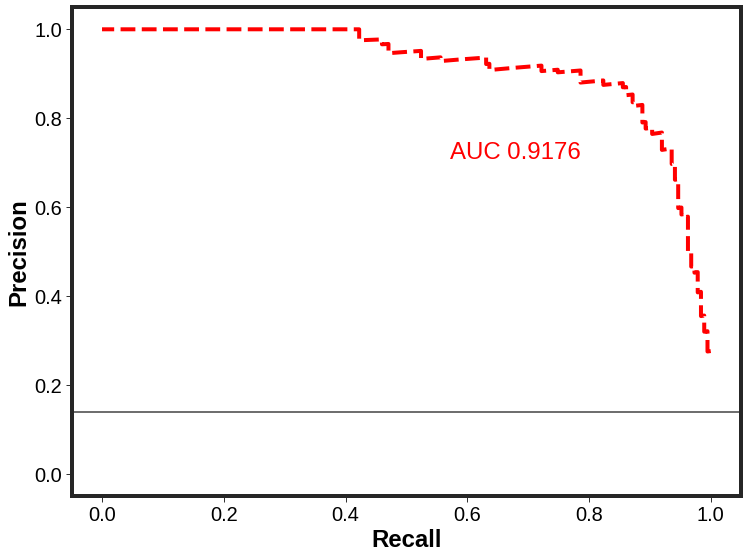

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(recall,precision,c='red',linestyle='dashed',linewidth=4)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, [0.14,0.14], 'k-', alpha=0.75, zorder=0)
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.annotate('AUC '+ str(round(auc(recall, precision),4)),
            xy=(450, 400), xycoords='figure pixels',c='red',fontsize=24)
ax.set_xlabel('Recall',fontsize=24,fontweight='bold',c='black')
ax.set_ylabel('Precision',fontsize=24,fontweight='bold',c='black')
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)
ax.tick_params(axis='x', colors='black')    
ax.tick_params(axis='y', colors='black')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Valor de Corte
En esta sección determinamos el valor de corte para cumplir con las demandas mínimas de sensibilidad. 

In [ ]:
recall[273]

0.8021390374331551

In [ ]:
thresholds[273]

0.754648357037783

In [ ]:
precision[273]

0.8823529411764706

# Clasificación Binaria
Ahora se clasifican las imágenes con el valor de corte seleccionado 

In [ ]:
#df.loc[df['column name'] condition, 'new column name'] = 'value if condition is met'

df.loc[df['prob'] > thresholds[273], 'resultado']  = 1 
df.loc[df['prob'] < thresholds[273], 'resultado']  = 0
df.head()

,Unnamed: 0,file_name,bb_counts,bb_cmax,bb_cmean,bb_cmedian,file_name.1,class,consolidation,prob,resultado,result
0,1,b4ef5c3ea6b611ebabb6f48e3885516d,52,0.761719,0.058247,0.003543,b4ef5c3ea6b611ebabb6f48e3885516d,Consolidation,1,0.995973,1,True
1,2,b4f2b7a8a6b611ebac95f48e3885516d,40,0.740234,0.065058,0.002604,b4f2b7a8a6b611ebac95f48e3885516d,Consolidation,1,0.977977,1,True
2,3,b4f2b7a9a6b611ebb8abf48e3885516d,178,0.727539,0.044015,0.003871,b4f2b7a9a6b611ebb8abf48e3885516d,Consolidation,1,1.000000,1,True
3,4,b4f2b7a9a6b611ebb8abf48e3885516d,178,0.727539,0.044015,0.003871,b4f2b7a9a6b611ebb8abf48e3885516d,Consolidation,1,1.000000,1,True
4,5,b4f2b7aaa6b611ebb118f48e3885516d,56,0.741699,0.067561,0.003333,b4f2b7aaa6b611ebb118f48e3885516d,Consolidation,1,0.997406,1,True


In [ ]:
df.resultado.value_counts()

0    1115
1     169
Name: resultado, dtype: int64

In [ ]:
169/1115

0.1515695067264574

In [ ]:
df['result'] = df['consolidation'] == df['resultado']

In [ ]:
df.head()

,Unnamed: 0,file_name,bb_counts,bb_cmax,bb_cmean,bb_cmedian,file_name.1,class,consolidation,prob,resultado,result
0,1,b4ef5c3ea6b611ebabb6f48e3885516d,52,0.761719,0.058247,0.003543,b4ef5c3ea6b611ebabb6f48e3885516d,Consolidation,1,0.995973,1,True
1,2,b4f2b7a8a6b611ebac95f48e3885516d,40,0.740234,0.065058,0.002604,b4f2b7a8a6b611ebac95f48e3885516d,Consolidation,1,0.977977,1,True
2,3,b4f2b7a9a6b611ebb8abf48e3885516d,178,0.727539,0.044015,0.003871,b4f2b7a9a6b611ebb8abf48e3885516d,Consolidation,1,1.000000,1,True
3,4,b4f2b7a9a6b611ebb8abf48e3885516d,178,0.727539,0.044015,0.003871,b4f2b7a9a6b611ebb8abf48e3885516d,Consolidation,1,1.000000,1,True
4,5,b4f2b7aaa6b611ebb118f48e3885516d,56,0.741699,0.067561,0.003333,b4f2b7aaa6b611ebb118f48e3885516d,Consolidation,1,0.997406,1,True


In [ ]:
df.resultado.value_counts()

0    1115
1     169
Name: resultado, dtype: int64

In [ ]:
df['consolidation'].value_counts()

0    1097
1     187
Name: consolidation, dtype: int64

In [ ]:
df.consolidation.dtype

dtype('int64')

In [ ]:
df.result.

dtype('bool')

In [ ]:
df.head()

,Unnamed: 0,file_name,bb_counts,bb_cmax,bb_cmean,bb_cmedian,file_name.1,class,consolidation,prob,resultado,result
0,1,b4ef5c3ea6b611ebabb6f48e3885516d,52,0.761719,0.058247,0.003543,b4ef5c3ea6b611ebabb6f48e3885516d,Consolidation,1,0.995973,1,True
1,2,b4f2b7a8a6b611ebac95f48e3885516d,40,0.740234,0.065058,0.002604,b4f2b7a8a6b611ebac95f48e3885516d,Consolidation,1,0.977977,1,True
2,3,b4f2b7a9a6b611ebb8abf48e3885516d,178,0.727539,0.044015,0.003871,b4f2b7a9a6b611ebb8abf48e3885516d,Consolidation,1,1.000000,1,True
3,4,b4f2b7a9a6b611ebb8abf48e3885516d,178,0.727539,0.044015,0.003871,b4f2b7a9a6b611ebb8abf48e3885516d,Consolidation,1,1.000000,1,True
4,5,b4f2b7aaa6b611ebb118f48e3885516d,56,0.741699,0.067561,0.003333,b4f2b7aaa6b611ebb118f48e3885516d,Consolidation,1,0.997406,1,True


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df['consolidation'].astype(bool).to_numpy(),df['resultado'].astype(bool).to_numpy())

In [ ]:
import os 
os.chdir('/content/drive/MyDrive/Colab Notebooks/PFC - Berrino E./03. Utils')
import MyFunctions as mf 

In [ ]:
mf.

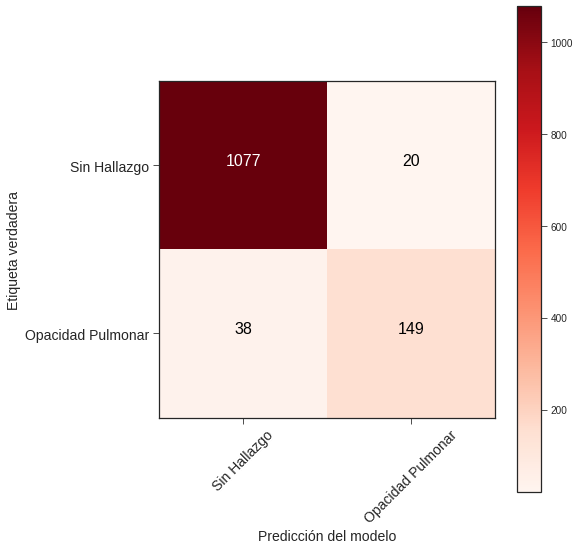

In [ ]:
import matplotlib.pyplot as plt
from itertools import product
classes = ["Sin Hallazgo", "Opacidad Pulmonar"]

plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title(None, fontsize=16)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, classes, rotation=45, fontsize=14)
plt.yticks(tick_marks, classes, fontsize=14)

thresh = cm.max() / 2.

for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center", fontsize=16,
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Etiqueta verdadera', fontsize=14)
plt.xlabel('Predicción del modelo', fontsize=14)
plt.show()


In [ ]:
from sklearn.metrics import f1_score
f1_score(df['consolidation'].astype(bool).to_numpy(),df['resultado'].astype(bool).to_numpy())

0.8370786516853933

In [ ]:
df_bad = df[df['result']==False]

In [ ]:
from skimage.io import imread
import cv2
!pip install bbox-visualizer
import bbox_visualizer as bbv

In [ ]:
for index,row in df_bad.iterrows():
  image = row['file_name']
  resultado = row['resultado']
  sample = imread(os.path.join('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/images/test/',f'{image}.jpg'))
  y_im, x_im = np.shape(sample)
  img = cv2.cvtColor(sample,cv2.COLOR_GRAY2RGB)
  plt.figure(figsize=(10, 10))
  if row['consolidation']:
    g_t =  pd.read_csv(os.path.join('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/labels/test',f'{image}.txt'),header=None,sep='\t')
    gt_x_mid_norm = g_t[1] 
    gt_y_mid_norm = g_t[1] 
    gt_width = g_t[3]
    gt_height = g_t[4]
    gt_boxes = np.array([gt_x_mid_norm*x_im,gt_y_mid_norm*y_im,gt_width*x_im,gt_height*y_im])
    gt_labels =  g_t[0]
  
    for box,label in zip(gt_boxes.transpose(),gt_labels):
        bbv.add_label(img, 
                      str(label), 
                      [int(round(box[0]-box[2]/2)), int(round(box[1]-box[3]/2)),int(round(box[0]+box[2]/2)), int(round(box[1]+box[3]/2))], 
                      draw_bg=True,
                      text_bg_color=(255,0,0),
                      text_color=(0,0,0),
                        )

        cv2.rectangle(img ,
                      (int(round(box[0]-box[2]/2)), int(round(box[1]-box[3]/2))),
                      (int(round(box[0]+box[2]/2)), int(round(box[1]+box[3]/2))),
                      (255,0,0),
                      2)

  if resultado==1: 
      rec = pd.read_csv(os.path.join('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/test/exp15/labels',f'{image}.txt'),header=None,sep=' ')
      width = rec[3]
      height = rec[4]  
      x_mid_norm = rec[1]
      y_min_norm = rec[2]
      boxes = np.array([x_mid_norm*x_im,y_min_norm*y_im,width*x_im,height*y_im])
      labels = rec[0]
      confs = rec[5]
      for box,label,conf in zip(boxes.transpose(),labels,confs):
        if(conf<0.4):
          pass 
        else:
          bbv.add_label(img, 
                        str(label) + str(conf), 
                        [int(round(box[0]-box[2]/2)), int(round(box[1]-box[3]/2)),int(round(box[0]+box[2]/2)), int(round(box[1]+box[3]/2))], 
                        draw_bg=True,
                        text_bg_color=(0,0,255),
                        text_color=(0,0,0),
                          )

          cv2.rectangle(img ,
                        (int(round(box[0]-box[2]/2)), int(round(box[1]-box[3]/2))),
                        (int(round(box[0]+box[2]/2)), int(round(box[1]+box[3]/2))),
                        (0,0,255),
                        2)
  plt.axis('off')
  plt.imshow(img)
  plt.savefig('/content/drive/MyDrive/Colab Notebooks/PFC - Berrino E./02. Opacidades Pulmonares/03.Resultados/Images/Bad/' + image+'.jpg',bbox_inches='tight')
    

Output hidden; open in https://colab.research.google.com to view.